# Kaggle Competition : encore_21_titanic

## Dataset Description  

passengerid: 탑승자 아이디  
survived:0=사망, 1=생존  
pclass: 1=1등석, 2=2등석, 3=3등석  
name: 탑승자 이름  
gender:male=남성, female=여성  
age: 나이  
sibsp: 타이타닉 호에 동승한 자매/배우자의 수  
parch: 타이타닉 호에 동승한 부모/자식의 수  
ticket: 티켓 번호  
fare: 승객 요금  
cabin: 방 호수  
embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴  

# Default Setting - Library & Variables

## Import Libraries (사용할 라이브러리 추가)

In [1]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

## Global Variables (전역 변수)

In [2]:
import easydict
import json
args = easydict.EasyDict()

# path 정보
args.default_path = '/Users/jhnam/workspace/playdata/encore21titanic/'

# get train and test dataset
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'

# get submission
args.submission_csv = args.default_path+"submission.csv"
# set submission
args.submission_csv_result = args.default_path+"submission_230221_t17.csv"

# 데이터 분석을 위한 변수들
args.random_state = 21

# Load Titanic Train & Test Dataset

## Get Dataset - Titanic train & test

In [3]:
org_train = pd.read_csv(args.train_csv)
org_test = pd.read_csv(args.test_csv)

print("org_train shape : ", org_train.shape)
print("org_test  shape : ", org_test.shape)

org_train shape :  (916, 12)
org_test  shape :  (393, 11)


# Train & Test Dataset Information

## org_train

In [4]:
org_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


In [5]:
org_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


## org_test

In [6]:
org_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  393 non-null    int64  
 1   pclass       393 non-null    int64  
 2   name         393 non-null    object 
 3   gender       393 non-null    object 
 4   age          310 non-null    float64
 5   sibsp        393 non-null    int64  
 6   parch        393 non-null    int64  
 7   ticket       393 non-null    object 
 8   fare         392 non-null    float64
 9   cabin        97 non-null     object 
 10  embarked     392 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 33.9+ KB


In [7]:
org_test.head(5)

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


## org_train heapmap

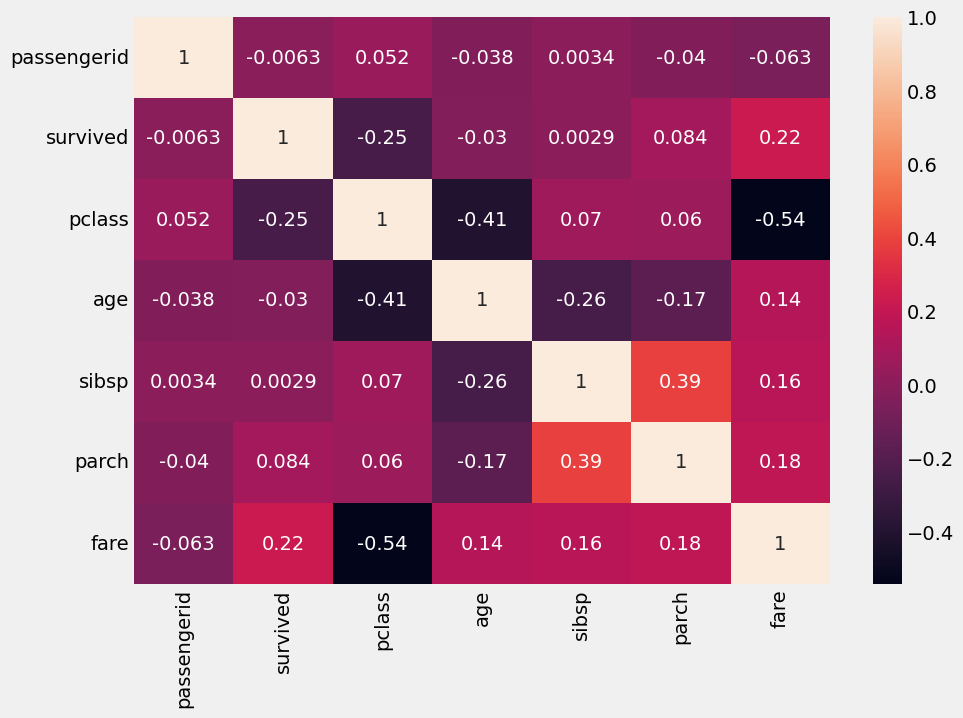

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(org_train.corr(),annot=True)
plt.show()

##### Important columns for 'survived' column

1) pclass  
2) fare  
3) parch  
4) age  
5) sibsp  

# Missing Value Check

## Train NaN Check

### org_train

Exists Missing Values

- age : 180
- cabin : 718
- embarked : 1

In [9]:
org_train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age            180
sibsp            0
parch            0
ticket           0
fare             0
cabin          718
embarked         1
dtype: int64

## Test NaN Check

### org_test

Exists Missing Values

- age : 83
- fare : 1
- cabin : 296
- embarked : 1

In [10]:
org_test.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age             83
sibsp            0
parch            0
ticket           0
fare             1
cabin          296
embarked         1
dtype: int64

# Data Cleaning

## Preset

### Set Dataframe to fill

In [11]:
fill_train = org_train
fill_test = org_test

## Columns

### title

##### Get name title

In [12]:
fill_train['name'].str.extract('([A-Za-z]+)\.').values[:10]

array([['Mr'],
       ['Miss'],
       ['Mrs'],
       ['Mr'],
       ['Mr'],
       ['Mrs'],
       ['Mr'],
       ['Miss'],
       ['Mr'],
       ['Mr']], dtype=object)

##### Set 'title'column for name

In [13]:
fill_train['title'] = fill_train['name'].str.extract('([A-Za-z]+)\.')
fill_test['title'] = fill_train['name'].str.extract('([A-Za-z]+)\.')

In [14]:
before_title = ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']
reform_title = ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr']

fill_train['title'].replace(before_title, reform_title, inplace=True)
fill_test['title'].replace(before_title, reform_title, inplace=True)

In [15]:
fill_train['title'].isnull().sum()

0

In [16]:
fill_train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S,Mr
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q,Miss
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S,Mrs
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Mr
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S,Mr


##### designation

In [17]:
dict_designation = {
    'Mr.': 11, # '남성'
    'Master.': 12, #'남성'
    'Sir.': 13, #'남성'
    'Miss.': 21, #'미혼 여성'
    'Mrs.': 22, #'기혼 여성'
    'Ms.': 23, #'미혼/기혼 여성'
    'Lady.': 24, # '숙녀'
    'Mlle.': 25, # '아가씨'
    'Dona.': 26,
    # 직업
    'Dr.': 30, # '의사'
    'Rev.': 31, # '목사'
    'Major.': 32, # '계급'
    'Don.': 33, # '교수'
    'Col.': 34, # '군인'
    'Capt.': 35, # '군인'
    # 귀족
    'Mme.': 40, # '영부인'
    'Countess.': 41, # '백작부인'
    'Jonkheer.': 42 # '귀족'
}

def add_designation(name): # 호칭 함수
    designation = "unknown"
    for key in dict_designation.keys():
        if key in name:
            designation = dict_designation[key]
            break
    return designation

fill_train['designation'] = fill_train['name'].map(lambda x: add_designation(x))
fill_test['designation'] = fill_test['name'].map(lambda x: add_designation(x))

In [18]:
cond = fill_train['designation'] == "unknown"
fill_train.loc[cond].head()

cond = fill_test['designation'] == "unknown"
fill_test.loc[cond].head()

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,title,designation


### age

##### Filling age with mean age for title

In [19]:
fill_train.groupby('title')['age'].mean()

title
Master     5.352286
Miss      21.788693
Mr        32.264286
Mrs       36.796610
Other     44.400000
Name: age, dtype: float64

In [20]:
mean_age_by_title = dict(fill_train.groupby('title')['age'].mean())

for key in mean_age_by_title.keys():
    t, m = key, mean_age_by_title[key]
    fill_train.loc[(fill_train.age.isnull())&(fill_train.title==t),'age'] = m
    fill_test.loc[(fill_test.age.isnull())&(fill_test.title==t),'age'] = m

In [21]:
fill_train['age'].isnull().sum()

0

### embarked

##### Filling embarkedn with mode of embarked

In [22]:
# embarked
embarked_mode = fill_train['embarked'].mode().values[0]

fill_train['embarked'].fillna(embarked_mode, inplace=True)
fill_test['embarked'].fillna(embarked_mode, inplace=True)

In [23]:
fill_train['embarked'].isnull().sum()

0

### fare

##### mean fare by pclass

In [24]:
fill_train.groupby('pclass').agg({"fare":"mean"})

,fare
pclass,
1,83.745613
2,20.388036
3,13.566363


##### Filling fare with mean of fare by pclass

In [25]:
mean_fare_by_pclass = dict(fill_train.groupby('pclass')['fare'].mean())

for key in mean_fare_by_pclass.keys():
    t, m = key, mean_fare_by_pclass[key]
    fill_train.loc[(fill_train.fare.isnull())&(fill_train.pclass==t),'fare'] = m
    fill_test.loc[(fill_test.fare.isnull())&(fill_test.pclass==t),'fare'] = m

In [26]:
fill_train['fare'].isnull().sum(), fill_test['fare'].isnull().sum()

(0, 0)

### cabin

##### About cabin

Deck

A, B and C : 1st class  
D, E : all class   
F, G : 2, 3 Class  

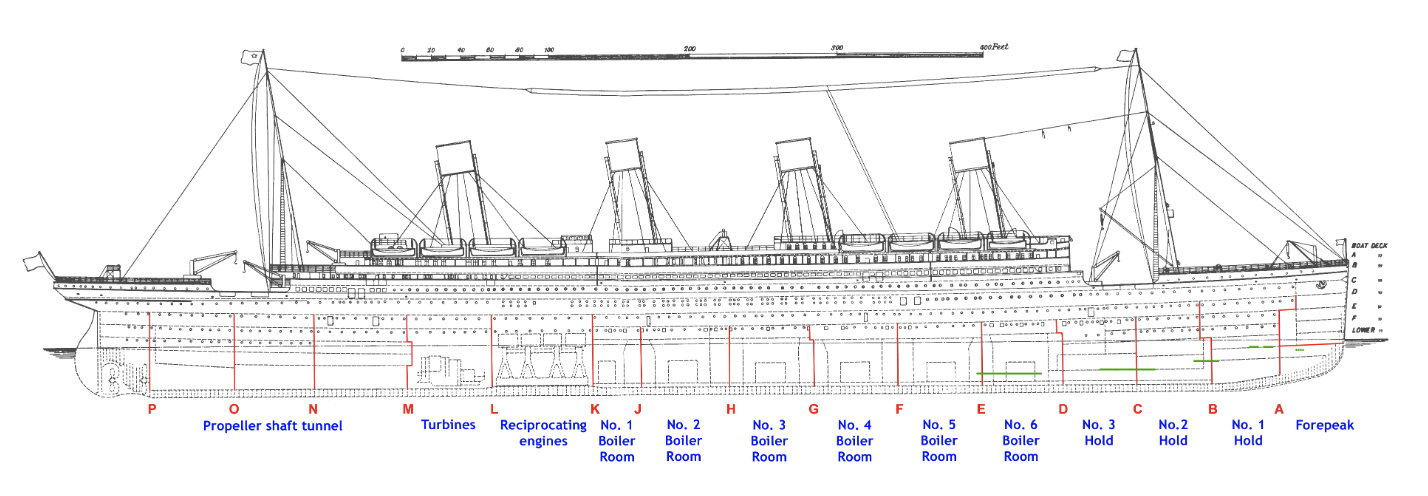

##### check cabin values

In [27]:
fill_train['cabin'].values[:50]

array([nan, nan, 'B69', nan, nan, nan, nan, nan, nan, nan, 'A34', nan,
       nan, nan, nan, nan, nan, nan, 'D28', nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, 'D28', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, 'B96 B98', nan, nan, nan, nan],
      dtype=object)

여러개의 방을 예약한 사람도 있음  
아마 단체일경우 방을 여러개 예약했을 수도?  

##### Filling cabin and Add deck column

In [28]:
fill_train['cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M').unique()

array(['M', 'B', 'A', 'D', 'C', 'E', 'F', 'G', 'T'], dtype=object)

In [29]:
fill_train['deck'] = fill_train['cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
fill_test['deck'] = fill_test['cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

In [30]:
fill_train['deck'].isnull().sum(), fill_test['deck'].isnull().sum()

(0, 0)

##### Drop cabin column

In [31]:
fill_train.drop(['cabin'], axis =1, inplace=True)
fill_test.drop(['cabin'], axis =1, inplace=True)

### Check Missing Value after data cleaning

##### fill_train

In [32]:
fill_train.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
gender         0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
title          0
designation    0
deck           0
dtype: int64

##### fill_test

In [33]:
fill_test.isnull().sum()

passengerid    0
pclass         0
name           0
gender         0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
title          0
designation    0
deck           0
dtype: int64

# Exploratory Data Analysis

## Preset

### Set Dataframe to EDA

In [34]:
eda_train = fill_train
eda_test = fill_test

In [35]:
eda_train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,32.264286,0,0,SC/PARIS 2159,12.8750,S,Mr,11,M
1,1,0,3,"Henry, Miss. Delia",female,21.788693,0,0,382649,7.7500,Q,Miss,21,M
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.000000,1,1,12749,93.5000,S,Mrs,22,B
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.000000,0,0,350043,7.7958,S,Mr,11,M
4,4,0,2,"Hold, Mr. Stephen",male,44.000000,1,0,26707,26.0000,S,Mr,11,M


In [36]:
eda_train.isnull().sum().sum()

0

## Feature

### pclass

##### survived by pclass

In [37]:
pd.crosstab(org_train['pclass'], org_train['survived'], margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,96,131,227
2,118,76,194
3,356,139,495
All,570,346,916


pclass 와 survived 의 관계를 살펴보니  
1 class 의 사람들보다 3 class 의 사람들이 많은 죽은 것으로 보인다.  
따라서, pcalss 에 따라 생존율이 달라질 수 있다는 것을 알 수 있다.  

##### survived by pclass and gender

In [38]:
pd.crosstab([org_train['pclass'], org_train['gender']], org_train['survived'], margins=True).style.background_gradient(cmap='summer_r')

1 class  
- 1 class 의 femail 성별을 가진 사람은 '한' 사람이 죽고 나머지는 살았다.  
- 1 class 의 male 성별을 가진 사람의 3/4 의 사람이 죽었다.  

2 class  
- 2 class 의 female 성별을 가진 사람 중 5 명을 제외한 나머지 사람이 살았다.  
- 2 class 의 male 성별을 가진 사람 중 9 명을 제외한 나머지 사람이 죽었다.  

3 class  
- 3 class 의 female 성별을 가진 사람이 타 class 에 비해 많이 죽은 것으로 확인된다.  
- 3 class 의 male 성별을 가진 사람이 많이 죽은 것으로 확인된다.  

* result  
각 클래스별로 살펴보면 female 성별을 가진 사람 중  
1, 2 class 보다 3 class 의 사람이 더 많이 죽은 것을 알 수 있다.  

따라서, 대부분 male 보다 female 의 성별을 가진 사람의 생존율이 높다는 것과   
class 가 낮을수록 생존율이 낮다는 것을 확인할 수 있다.  

##### Add survived by pclass

In [39]:
mean_survived_by_pclass = eda_train.groupby("pclass").agg({"survived" : "mean"}).reset_index()
mean_survived_by_pclass.rename(columns = {'survived' : 'survived_by_pclass'}, inplace = True)

eda_train = pd.merge(eda_train, mean_survived_by_pclass, how="left", on="pclass") 
eda_test = pd.merge(eda_test, mean_survived_by_pclass, how="left", on="pclass")

In [40]:
eda_train['survived_by_pclass'].isnull().sum()

0

In [41]:
eda_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,32.264286,0,0,SC/PARIS 2159,12.8750,S,Mr,11,M,0.391753
1,1,0,3,"Henry, Miss. Delia",female,21.788693,0,0,382649,7.7500,Q,Miss,21,M,0.280808
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.000000,1,1,12749,93.5000,S,Mrs,22,B,0.577093
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.000000,0,0,350043,7.7958,S,Mr,11,M,0.280808
4,4,0,2,"Hold, Mr. Stephen",male,44.000000,1,0,26707,26.0000,S,Mr,11,M,0.391753


### gender

##### survived by gender

In [42]:
pd.crosstab(org_train['gender'], org_train['survived'], margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
gender,,,
female,54,273,327
male,516,73,589
All,570,346,916


In [43]:
org_train[['gender','survived']].groupby(['gender']).mean()

,survived
gender,
female,0.834862
male,0.123939


female 의 생존율은   83.48 %    
male   의 생존율은   12.39 %  

따라서, male 보다 female 의 생존율이 더 높다 것을 확인할 수 있다.  

##### Add survived by gender

In [44]:
mean_survived_by_gender = eda_train.groupby("gender").agg({"survived" : "mean"}).reset_index()
mean_survived_by_gender.rename(columns = {'survived' : 'survived_by_gender'}, inplace = True)

eda_train = pd.merge(eda_train, mean_survived_by_gender, how="left", on="gender") 
eda_test = pd.merge(eda_test, mean_survived_by_gender, how="left", on="gender")

In [45]:
eda_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass,survived_by_gender
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,32.264286,0,0,SC/PARIS 2159,12.8750,S,Mr,11,M,0.391753,0.123939
1,1,0,3,"Henry, Miss. Delia",female,21.788693,0,0,382649,7.7500,Q,Miss,21,M,0.280808,0.834862
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.000000,1,1,12749,93.5000,S,Mrs,22,B,0.577093,0.834862
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.000000,0,0,350043,7.7958,S,Mr,11,M,0.280808,0.123939
4,4,0,2,"Hold, Mr. Stephen",male,44.000000,1,0,26707,26.0000,S,Mr,11,M,0.391753,0.123939


### age

##### survived by gender and pclass and age

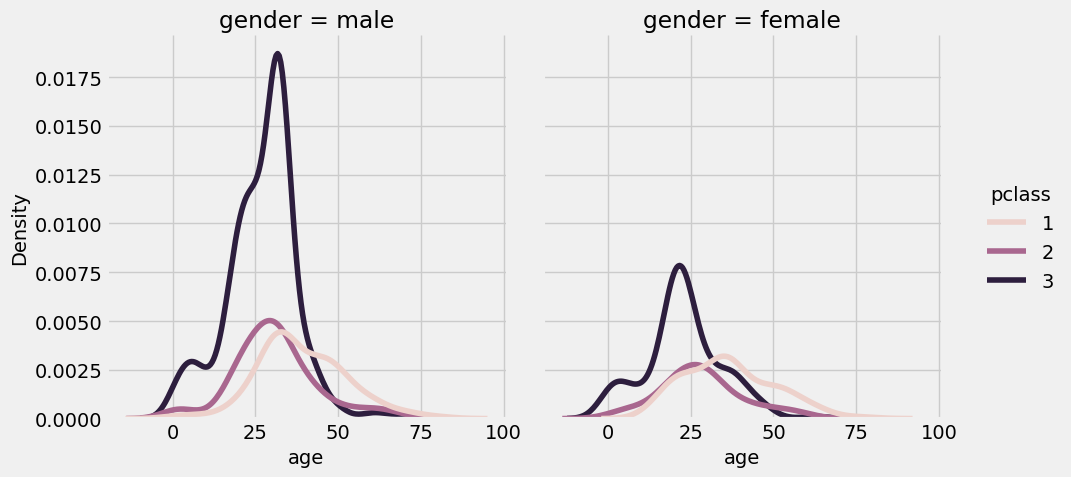

In [46]:
sns.displot(data=org_train, x='age', hue="pclass", col="gender", kind="kde")

##### Add age_group

In [47]:
age_range = [0, 5, 12, 18, 29, 49, 64, 100]
age_labels = ["bady", "child", "teenager", "adult", "middle", "senior", "super-elderly"]

eda_train['age_group'] = pd.cut(eda_train['age'], age_range, labels=age_labels)
eda_test['age_group'] = pd.cut(eda_test['age'], age_range, labels=age_labels)

In [48]:
eda_train['age_group'].isnull().sum()

0

In [49]:
eda_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass,survived_by_gender,age_group
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,32.264286,0,0,SC/PARIS 2159,12.8750,S,Mr,11,M,0.391753,0.123939,middle
1,1,0,3,"Henry, Miss. Delia",female,21.788693,0,0,382649,7.7500,Q,Miss,21,M,0.280808,0.834862,adult
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.000000,1,1,12749,93.5000,S,Mrs,22,B,0.577093,0.834862,senior
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.000000,0,0,350043,7.7958,S,Mr,11,M,0.280808,0.123939,adult
4,4,0,2,"Hold, Mr. Stephen",male,44.000000,1,0,26707,26.0000,S,Mr,11,M,0.391753,0.123939,middle


### family_size

##### make family size from sibsp and parch

fmaily size 는 아래와 같이 구할 수 있다.

> fmaily size = 1(자기 자신) + sibsp(형제 또는 배우자) + parch(부모 또는 자식)  

##### Add family_size

In [50]:
eda_train['family_size'] = 0
eda_train['family_size'] = eda_train['sibsp'] + eda_train['parch'] + 1

eda_test['family_size'] = 0
eda_test['family_size'] = eda_test['sibsp'] + eda_test['parch'] + 1

In [51]:
eda_train['family_size'].isnull().sum()

0

In [52]:
eda_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass,survived_by_gender,age_group,family_size
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,32.264286,0,0,SC/PARIS 2159,12.8750,S,Mr,11,M,0.391753,0.123939,middle,1
1,1,0,3,"Henry, Miss. Delia",female,21.788693,0,0,382649,7.7500,Q,Miss,21,M,0.280808,0.834862,adult,1
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.000000,1,1,12749,93.5000,S,Mrs,22,B,0.577093,0.834862,senior,3
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.000000,0,0,350043,7.7958,S,Mr,11,M,0.280808,0.123939,adult,1
4,4,0,2,"Hold, Mr. Stephen",male,44.000000,1,0,26707,26.0000,S,Mr,11,M,0.391753,0.123939,middle,2


##### family_size by pclass

In [53]:
pd.crosstab(eda_train['pclass'], eda_train['family_size'], margins=True).style.background_gradient(cmap='summer_r')

family_size,1,2,3,4,5,6,7,8,11,All
pclass,,,,,,,,,,
1,117,76,22,5,4,3,0,0,0,227
2,113,38,33,8,1,1,0,0,0,194
3,328,49,54,13,14,15,9,6,7,495
All,558,163,109,26,19,19,9,6,7,916


##### survived by family_size and pclass

In [54]:
pd.crosstab(eda_train['survived'], [eda_train['pclass'], eda_train['family_size']], margins=True).style.background_gradient(cmap='summer_r')

### fare

##### Add fare_range

In [55]:
eda_train['fare_range'] = pd.qcut(eda_train['fare'],4)
eda_test['fare_range'] = pd.qcut(eda_test['fare'],4)

In [56]:
eda_train.groupby(['fare_range'])['survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,survived
fare_range,
"(-0.001, 7.896]",0.238095
"(7.896, 14.458]",0.275109
"(14.458, 30.018]",0.440529
"(30.018, 512.329]",0.558952


##### Add fare_group

In [57]:
eda_train.groupby(['fare_range'])['survived'].mean()

fare_range
(-0.001, 7.896]      0.238095
(7.896, 14.458]      0.275109
(14.458, 30.018]     0.440529
(30.018, 512.329]    0.558952
Name: survived, dtype: float64

In [58]:
fare_split = [0, 7.896, 14.458, 30.018, 513]

eda_train['fare_group'] = 0
eda_test['fare_group'] = 0

for i in range(len(fare_split)-1):
    eda_train.loc[(fare_split[i]<eda_train['fare'])&(eda_train['fare']<fare_split[i+1]), 'fare_group'] = i
    eda_test.loc[(fare_split[i]<eda_test['fare'])&(eda_test['fare']<fare_split[i+1]), 'fare_group'] = i

In [59]:
eda_train[eda_train['fare_group'].isnull()]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass,survived_by_gender,age_group,family_size,fare_range,fare_group


### cabin

##### Many columns by deck and pclass

In [60]:
eda_train_decks = eda_train.groupby(['deck', 'pclass']).count().drop(
    columns=['survived', 'gender', 'age', 'fare', 'embarked']
).rename(columns={'Name': 'Count'}).transpose()

eda_train_decks

deck                 A   B   C   D      E        F     G   M            T
pclass               1   1   1   1  2   1  2  3  2  3  3   1    2    3  1
passengerid         15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
name                15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
sibsp               15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
parch               15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
ticket              15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
title               15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
designation         15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
survived_by_pclass  15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
survived_by_gender  15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
age_group           15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
family_size         15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
fare_range          15  45  62  28  4  22  3  2  8  4  4  54  179  485  1
fare_group          15  45  62  28  4  22  3  2  8  4  4  54  179  485  1

##### deck count

In [61]:
eda_train_decks.columns.levels[0]

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T'], dtype='object', name='deck')

In [62]:
def get_pclass_dist(df):
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]
    
    print(decks)
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

get_pclass_dist(eda_train_decks)

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T'], dtype='object', name='deck')


({'A': {1: 15, 2: 0, 3: 0},
  'B': {1: 45, 2: 0, 3: 0},
  'C': {1: 62, 2: 0, 3: 0},
  'D': {1: 28, 2: 4, 3: 0},
  'E': {1: 22, 2: 3, 3: 2},
  'F': {1: 0, 2: 8, 3: 4},
  'G': {1: 0, 2: 0, 3: 4},
  'M': {1: 54, 2: 179, 3: 485},
  'T': {1: 1, 2: 0, 3: 0}},
 {'A': [100.0, 0.0, 0.0],
  'B': [100.0, 0.0, 0.0],
  'C': [100.0, 0.0, 0.0],
  'D': [87.5, 12.5, 0.0],
  'E': [81.48148148148148, 11.11111111111111, 7.4074074074074066],
  'F': [0.0, 66.66666666666666, 33.33333333333333],
  'G': [0.0, 0.0, 100.0],
  'M': [7.520891364902507, 24.930362116991645, 67.54874651810584],
  'T': [100.0, 0.0, 0.0]})

##### display pclass by deck

In [63]:
def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show() 

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T'], dtype='object', name='deck')


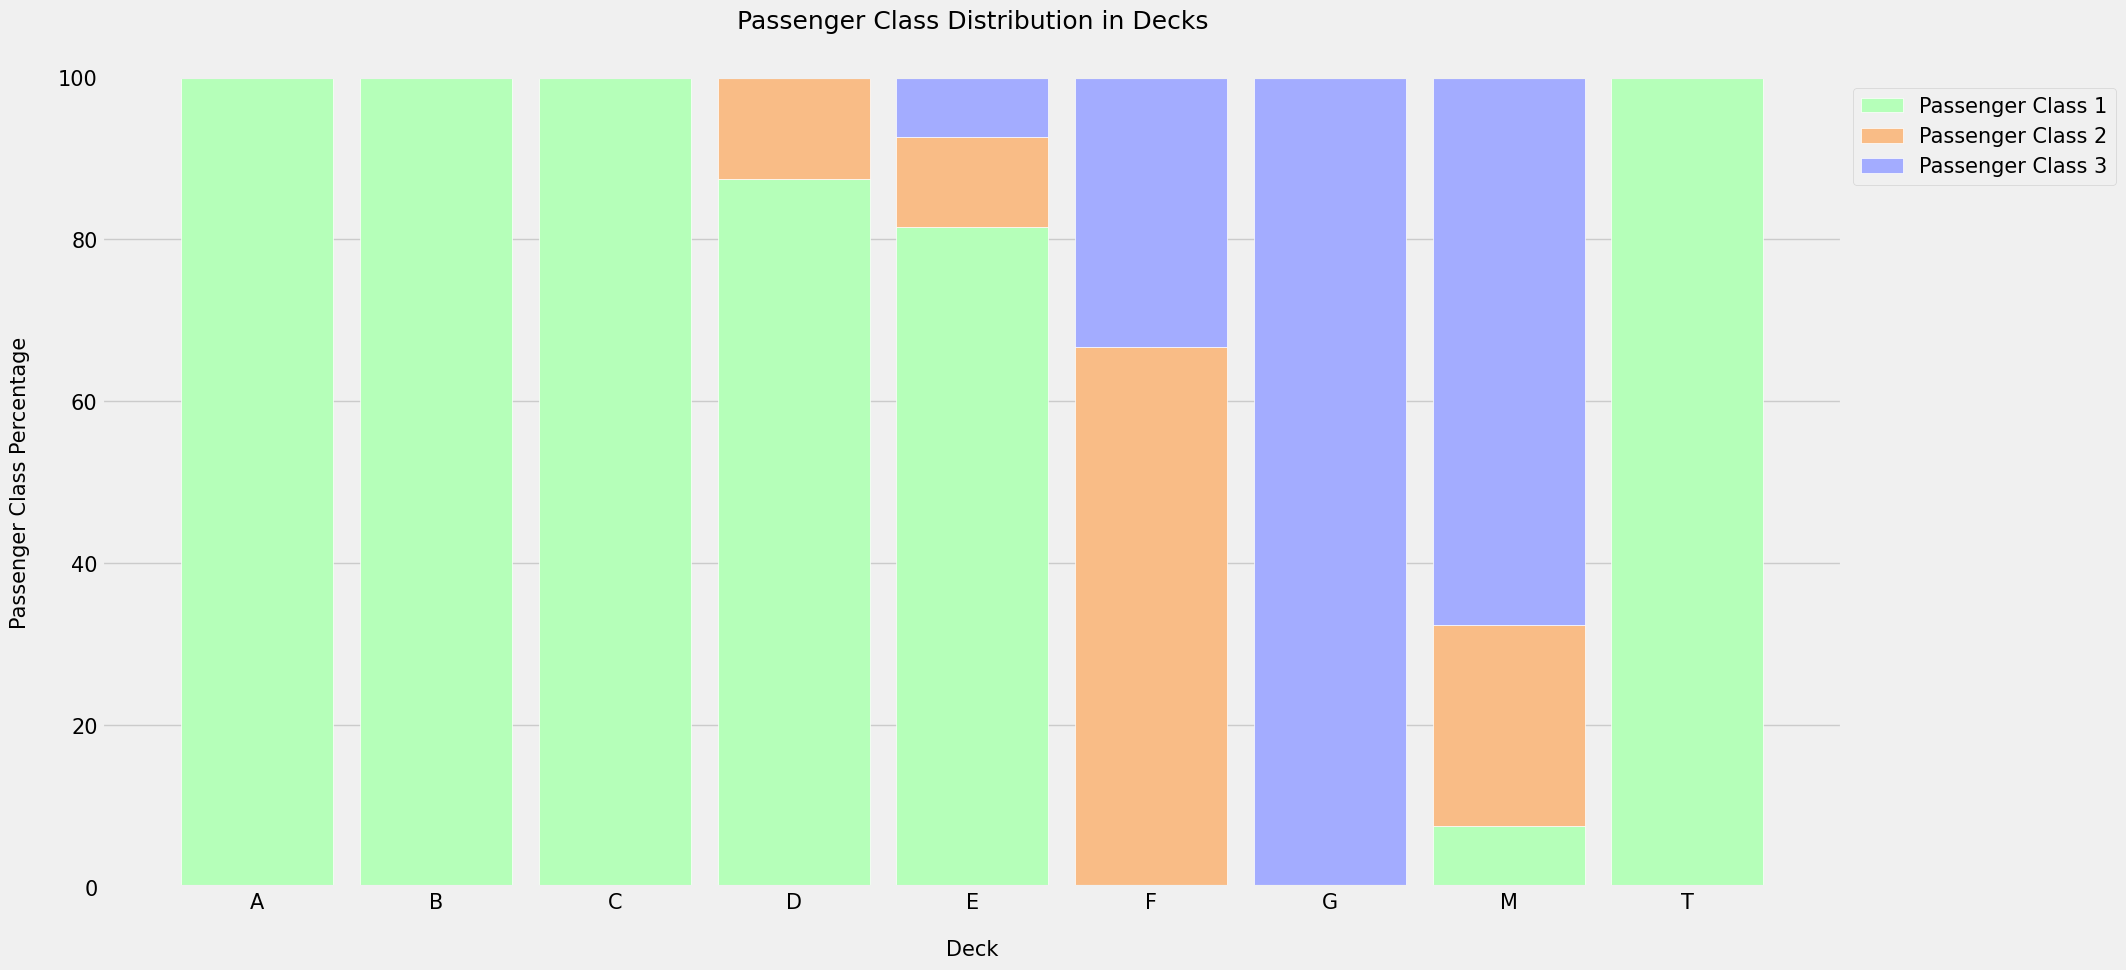

In [64]:
all_deck_count, all_deck_per = get_pclass_dist(eda_train_decks)
display_pclass_dist(all_deck_per)

##### Change 'T' -> 'A'

In [65]:
idx = eda_train[eda_train['deck'] == 'T'].index
eda_train.loc[idx, 'deck'] = 'A'

idx = eda_test[eda_test['deck'] == 'T'].index
eda_test.loc[idx, 'deck'] = 'A'

##### Many columns by deck and pclass

In [66]:
eda_all_decks_survived = eda_train.groupby(['deck', 'survived']).count().drop(
    columns=['gender', 'age', 'fare', 'embarked', 'pclass']
).rename(columns={'Name': 'Count'}).transpose()

eda_all_decks_survived

deck                A      B       C       D      E      F     G       M     
survived            0  1   0   1   0   1   0   1  0   1  0  1  0  1    0    1
passengerid         9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
name                9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
sibsp               9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
parch               9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
ticket              9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
title               9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
designation         9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
survived_by_pclass  9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
survived_by_gender  9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
age_group           9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
family_size         9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
fare_range          9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226
fare_group          9  7  13  32  29  33  11  21  8  19  6  6  2  2  492  226

##### display survived by deck

In [67]:
eda_all_decks_survived.columns.levels[0]

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M'], dtype='object', name='deck')

In [68]:
def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

get_survived_dist(eda_all_decks_survived)

({'A': {0: 9, 1: 7},
  'B': {0: 13, 1: 32},
  'C': {0: 29, 1: 33},
  'D': {0: 11, 1: 21},
  'E': {0: 8, 1: 19},
  'F': {0: 6, 1: 6},
  'G': {0: 2, 1: 2},
  'M': {0: 492, 1: 226}},
 {'A': [56.25, 43.75],
  'B': [28.888888888888886, 71.11111111111111],
  'C': [46.774193548387096, 53.2258064516129],
  'D': [34.375, 65.625],
  'E': [29.629629629629626, 70.37037037037037],
  'F': [50.0, 50.0],
  'G': [50.0, 50.0],
  'M': [68.52367688022284, 31.47632311977716]})

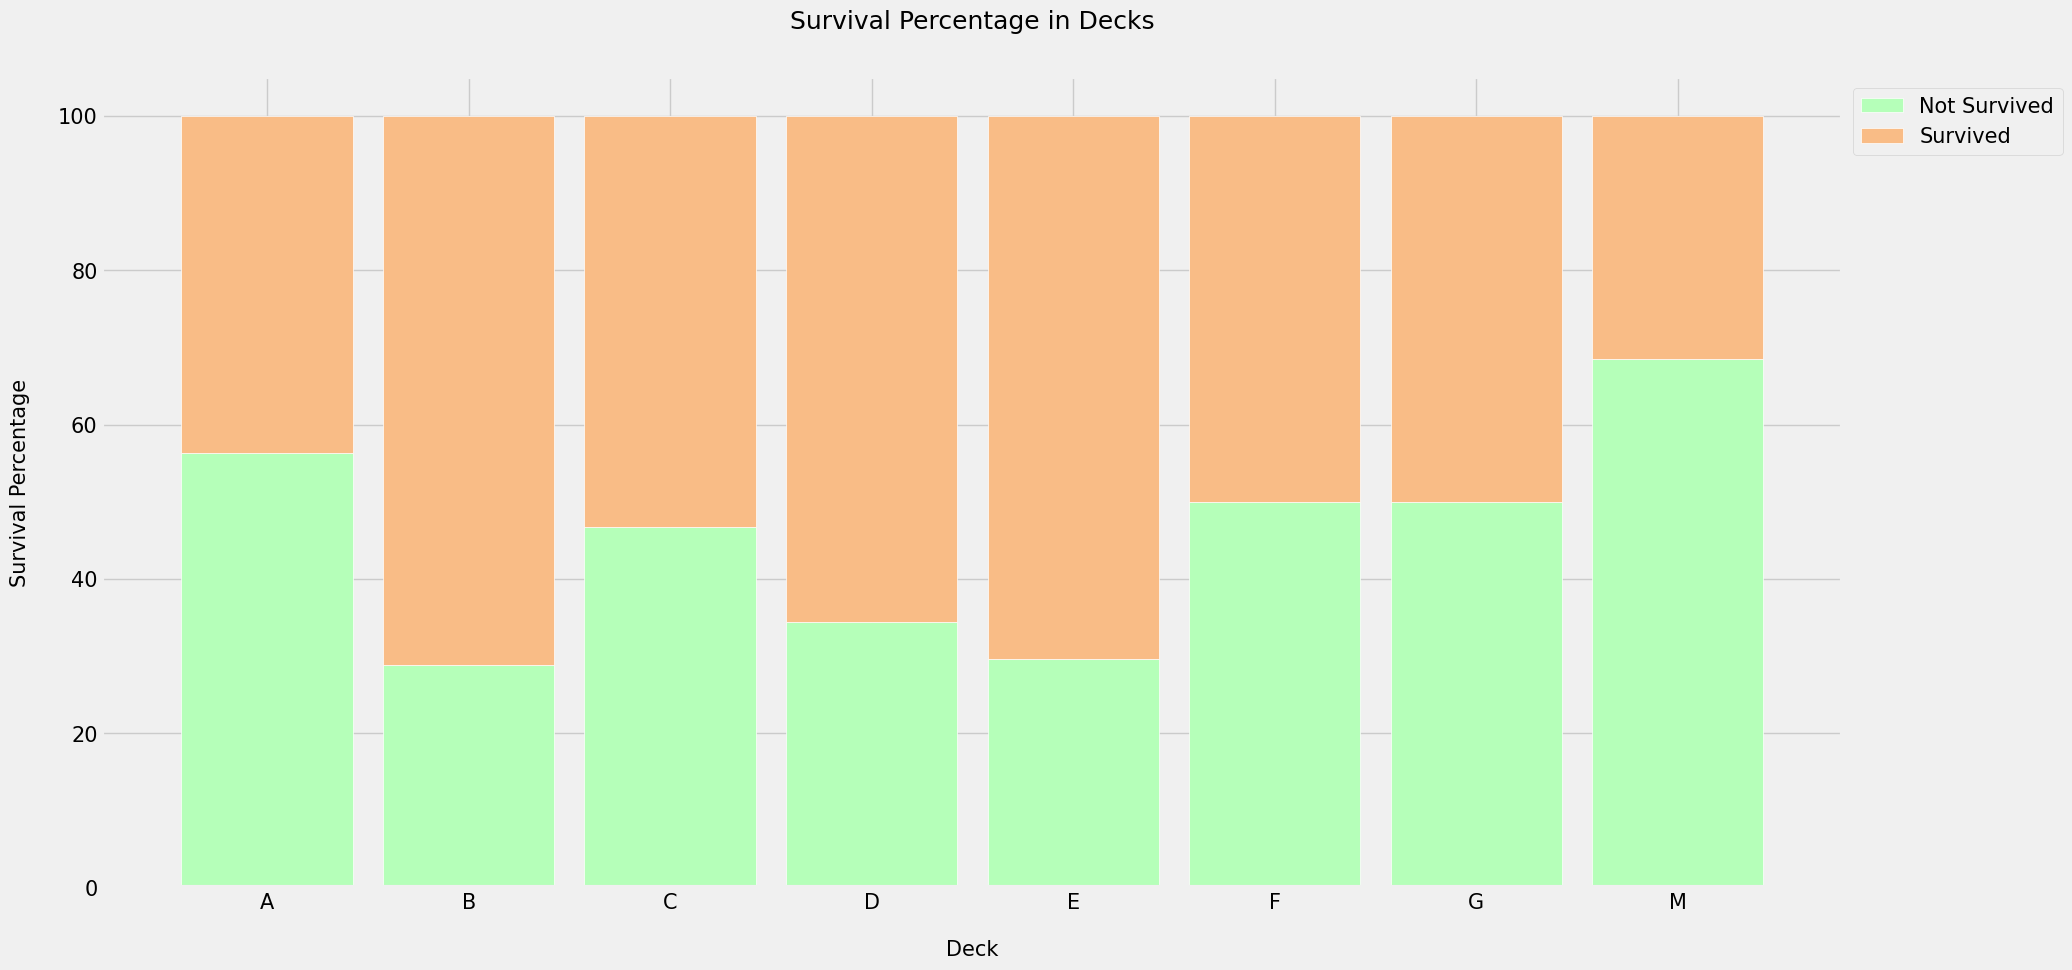

In [69]:
def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(eda_all_decks_survived)
display_surv_dist(all_surv_per)

##### repalce deck values

In [70]:
eda_train['deck'] = eda_train['deck'].replace(['A', 'B', 'C'], 'ABC')
eda_train['deck'] = eda_train['deck'].replace(['D', 'E'], 'DE')
eda_train['deck'] = eda_train['deck'].replace(['F', 'G'], 'FG')

eda_test['deck'] = eda_test['deck'].replace(['A', 'B', 'C'], 'ABC')
eda_test['deck'] = eda_test['deck'].replace(['D', 'E'], 'DE')
eda_test['deck'] = eda_test['deck'].replace(['F', 'G'], 'FG')

eda_train['deck'].value_counts(), eda_test['deck'].value_counts()

(M      718
 ABC    123
 DE      59
 FG      16
 Name: deck, dtype: int64,
 M      296
 ABC     59
 DE      28
 FG      10
 Name: deck, dtype: int64)

In [71]:
eda_train.isnull().sum()

passengerid           0
survived              0
pclass                0
name                  0
gender                0
age                   0
sibsp                 0
parch                 0
ticket                0
fare                  0
embarked              0
title                 0
designation           0
deck                  0
survived_by_pclass    0
survived_by_gender    0
age_group             0
family_size           0
fare_range            0
fare_group            0
dtype: int64

# Data Encoding

## Featrue

### title

##### title mapping

In [72]:
title_mapping = {
    "Master" : 1,
    "Miss" : 2,
    "Mr" : 3,
    "Mrs" : 4,
    "Other" : 5
}

eda_train['title'] = eda_train['title'].map(title_mapping)
eda_test['title'] = eda_test['title'].map(title_mapping)

In [73]:
eda_train[eda_train['title'].isnull()]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass,survived_by_gender,age_group,family_size,fare_range,fare_group


### gender

##### gender mapping

In [74]:
gender_mapping = {
    'male': 0, 
    "female": 1
}

eda_train["gender"] = eda_train["gender"].map(gender_mapping)
eda_test["gender"] = eda_test["gender"].map(gender_mapping)

In [75]:
eda_train[eda_train['gender'].isnull()]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass,survived_by_gender,age_group,family_size,fare_range,fare_group


### age_group

##### age_group mapping

In [76]:
age_mapping = {
    "bady" : 1, 
    "child" : 2,
    "teenager" : 3,
    "adult" : 4,
    "middle" : 5,
    "senior" : 6,
    "super-elderly" : 7
}

eda_train['age_group'] = eda_train['age_group'].map(age_mapping)
eda_test['age_group'] = eda_test['age_group'].map(age_mapping)

In [77]:
eda_train[eda_train['age_group'].isnull()]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass,survived_by_gender,age_group,family_size,fare_range,fare_group


### embarked

##### embarked mapping

In [78]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3 }

eda_train["embarked"] = eda_train["embarked"].map(embarked_mapping)
eda_test["embarked"] = eda_test["embarked"].map(embarked_mapping)

In [79]:
eda_train[eda_train['embarked'].isnull()]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass,survived_by_gender,age_group,family_size,fare_range,fare_group


In [80]:
eda_train['embarked']

0      1
1      3
2      1
3      1
4      1
      ..
911    2
912    1
913    1
914    3
915    2
Name: embarked, Length: 916, dtype: int64

### deck

##### deck mapping

In [81]:
eda_train['deck'].unique()

array(['M', 'ABC', 'DE', 'FG'], dtype=object)

In [82]:
deck_mapping = {'ABC':1, 'DE':2, 'FG':3, 'M':4}

eda_train["deck"] = eda_train["deck"].map(deck_mapping)
eda_test["deck"] = eda_test["deck"].map(deck_mapping)

In [83]:
eda_train[eda_train['deck'].isnull()]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass,survived_by_gender,age_group,family_size,fare_range,fare_group


### Check Data after encoding

In [84]:
eda_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass,survived_by_gender,age_group,family_size,fare_range,fare_group
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",0,32.264286,0,0,SC/PARIS 2159,12.8750,1,3,11,4,0.391753,0.123939,5,1,"(7.896, 14.458]",1
1,1,0,3,"Henry, Miss. Delia",1,21.788693,0,0,382649,7.7500,3,2,21,4,0.280808,0.834862,4,1,"(-0.001, 7.896]",0
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",1,52.000000,1,1,12749,93.5000,1,4,22,1,0.577093,0.834862,6,3,"(30.018, 512.329]",3
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,27.000000,0,0,350043,7.7958,1,3,11,4,0.280808,0.123939,4,1,"(-0.001, 7.896]",0
4,4,0,2,"Hold, Mr. Stephen",0,44.000000,1,0,26707,26.0000,1,3,11,4,0.391753,0.123939,5,2,"(14.458, 30.018]",2


## Encoder

### OneHotEncoder

In [85]:
eda_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'title', 'designation', 'deck',
       'survived_by_pclass', 'survived_by_gender', 'age_group', 'family_size',
       'fare_range', 'fare_group'],
      dtype='object')

In [86]:
# from sklearn.preprocessing import OneHotEncoder

# enc_cols = ['pclass', 'gender', 'deck']

# enc = OneHotEncoder()

# tmp_train = pd.DataFrame(enc.fit_transform(eda_train[enc_cols]).toarray(), columns = enc.get_feature_names_out())
# eda_train = pd.concat([eda_train.reset_index(drop=True), tmp_train.reset_index(drop=True)], axis=1)

# tmp_test = pd.DataFrame(enc.fit_transform(eda_test[enc_cols]).toarray(), columns = enc.get_feature_names_out())
# eda_test = pd.concat([eda_test.reset_index(drop=True), tmp_test.reset_index(drop=True)], axis=1)

# Final train and test Data

## Setting Train and Test Columns

### Set Columns

##### check columns

In [87]:
eda_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'title', 'designation', 'deck',
       'survived_by_pclass', 'survived_by_gender', 'age_group', 'family_size',
       'fare_range', 'fare_group'],
      dtype='object')

##### check data

In [88]:
eda_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,designation,deck,survived_by_pclass,survived_by_gender,age_group,family_size,fare_range,fare_group
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",0,32.264286,0,0,SC/PARIS 2159,12.8750,1,3,11,4,0.391753,0.123939,5,1,"(7.896, 14.458]",1
1,1,0,3,"Henry, Miss. Delia",1,21.788693,0,0,382649,7.7500,3,2,21,4,0.280808,0.834862,4,1,"(-0.001, 7.896]",0
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",1,52.000000,1,1,12749,93.5000,1,4,22,1,0.577093,0.834862,6,3,"(30.018, 512.329]",3
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,27.000000,0,0,350043,7.7958,1,3,11,4,0.280808,0.123939,4,1,"(-0.001, 7.896]",0
4,4,0,2,"Hold, Mr. Stephen",0,44.000000,1,0,26707,26.0000,1,3,11,4,0.391753,0.123939,5,2,"(14.458, 30.018]",2


### Un neccessery columns

##### drop columns

In [89]:
train = eda_train.drop(['name', 'age', 'ticket', 'fare', 'fare_range'], axis=1)
test = eda_test.drop(['name', 'age', 'ticket', 'fare', 'fare_range'], axis=1)

In [90]:
train.head(5)

,passengerid,survived,pclass,gender,sibsp,parch,embarked,title,designation,deck,survived_by_pclass,survived_by_gender,age_group,family_size,fare_group
0,0,0,2,0,0,0,1,3,11,4,0.391753,0.123939,5,1,1
1,1,0,3,1,0,0,3,2,21,4,0.280808,0.834862,4,1,0
2,2,1,1,1,1,1,1,4,22,1,0.577093,0.834862,6,3,3
3,3,1,3,0,0,0,1,3,11,4,0.280808,0.123939,4,1,0
4,4,0,2,0,1,0,1,3,11,4,0.391753,0.123939,5,2,2


### EDA heatmap

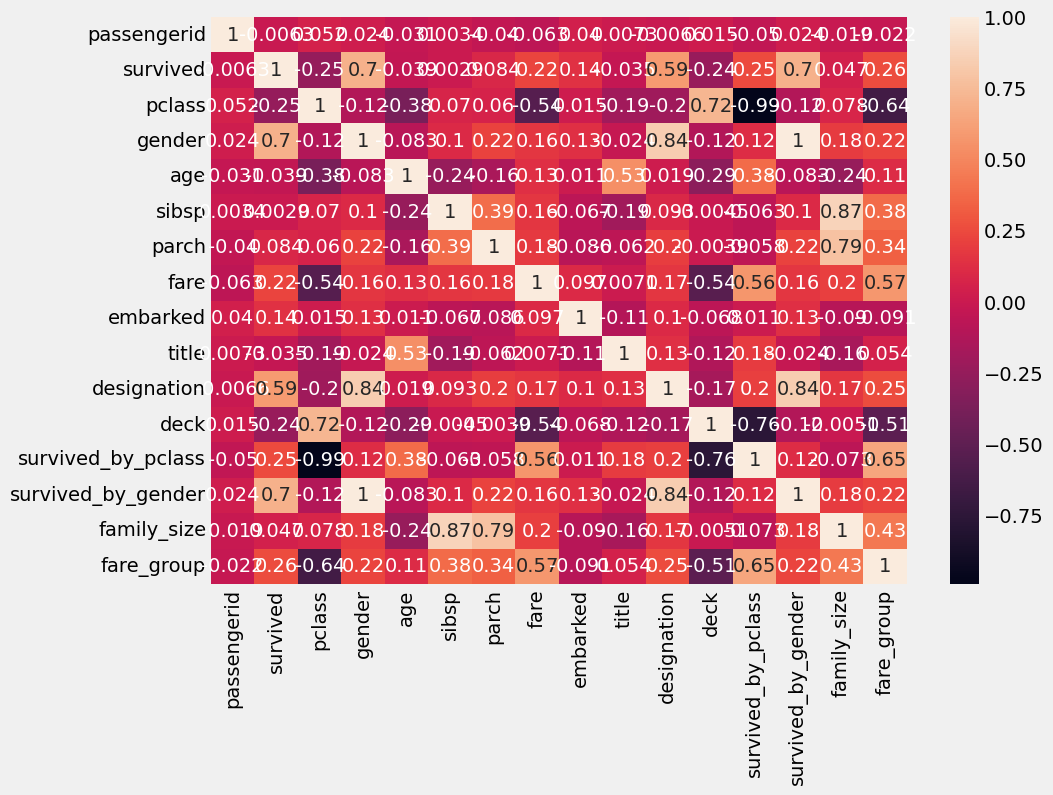

In [91]:
plt.figure(figsize=(10,7))
sns.heatmap(eda_train.corr(),annot=True)
plt.show()

# Run Machine Learning

## Columns for training 

### Set columns

##### check columns

In [92]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'gender', 'sibsp', 'parch',
       'embarked', 'title', 'designation', 'deck', 'survived_by_pclass',
       'survived_by_gender', 'age_group', 'family_size', 'fare_group'],
      dtype='object')

In [93]:
X = train.drop(['passengerid', 'survived', 'embarked', 'survived_by_pclass', 'survived_by_gender', 'family_size'], axis=1)
y = train['survived'] # target

test = test.drop(['embarked', 'survived_by_pclass', 'survived_by_gender', 'family_size'], axis=1)

X.shape, y.shape, test.shape

((916, 9), (916,), (393, 10))

##### set test index 

In [94]:
test.set_index(['passengerid'], inplace=True)  

print(f'{test.shape}')
test.head()

(393, 9)


,pclass,gender,sibsp,parch,title,designation,deck,age_group,fare_group
passengerid,,,,,,,,,
916,3,1,0,0,3,21,4,3,1
917,2,1,0,0,2,22,4,5,1
918,3,1,0,0,4,21,4,5,0
919,3,0,0,0,3,11,4,5,0
920,1,1,1,1,3,22,4,5,3


##### Feature list

- pclass : 등석에 따른 생존율
- gender : 성별에 따른 생존률

##### check shape and column count

In [95]:
X.shape, y.shape, test.shape

((916, 9), (916,), (393, 9))

## Preset train and test

### Split Data

##### train_test_split by sklearn

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    stratify = train['survived'],
    random_state = args.random_state
)

In [97]:
X_train.shape, X_test.shape, test.shape

((732, 9), (184, 9), (393, 9))

In [98]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0, 0)

In [99]:
test.head(5)

,pclass,gender,sibsp,parch,title,designation,deck,age_group,fare_group
passengerid,,,,,,,,,
916,3,1,0,0,3,21,4,3,1
917,2,1,0,0,2,22,4,5,1
918,3,1,0,0,4,21,4,5,0
919,3,0,0,0,3,11,4,5,0
920,1,1,1,1,3,22,4,5,3


## Apply Scaler

### Standard Scaler

##### apply StandardScaler

In [100]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
stdscaler.fit(X_train)

X_train_std_scaled = stdscaler.fit_transform(X_train)
X_test_std_scaled = stdscaler.transform(X_test)

### RobustScaler

In [101]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
rbs.fit(X_train)

X_train_rb_scaled = rbs.fit_transform(X_train)
X_test_rb_scaled = rbs.transform(X_test)

## Apply Model

### Decision Tree

##### No Scaler

In [102]:
from sklearn.tree import DecisionTreeClassifier

deicisiontree = DecisionTreeClassifier(random_state=args.random_state)
deicisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=21)

In [103]:
deicisiontree.score(X_train,y_train) , deicisiontree.score(X_test,y_test)

(0.9234972677595629, 0.8043478260869565)

In [104]:
from sklearn.metrics import roc_curve, auc 

pred = deicisiontree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred)

decisiontree_auc = auc(fpr, tpr)
decisiontree_auc

0.7998120300751881

In [105]:
test_pred = deicisiontree.predict_proba(test)[:, 1]
test_pred.shape

(393,)

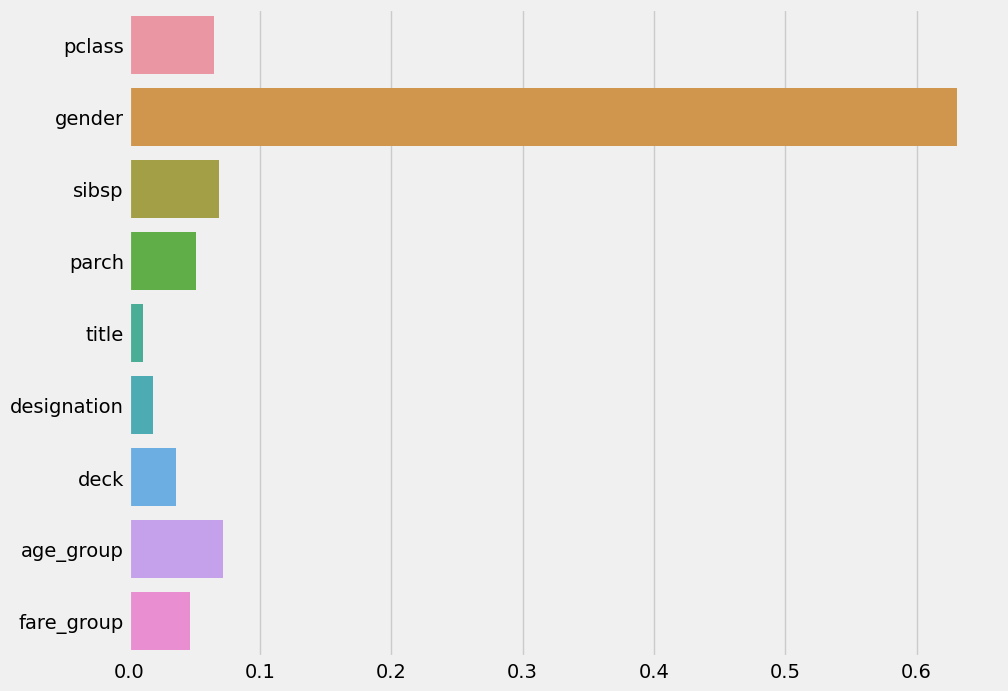

In [106]:
plt.figure(figsize=(10,8))
sns.barplot(x=deicisiontree.feature_importances_, y=X_train.columns)
plt.show()

##### Apply Standard Scaler

In [107]:
deicisiontree_scaled = DecisionTreeClassifier(random_state=args.random_state)
deicisiontree_scaled.fit(X_train_std_scaled, y_train)

DecisionTreeClassifier(random_state=21)

In [108]:
deicisiontree_scaled.score(X_train_std_scaled,y_train) , deicisiontree_scaled.score(X_test_std_scaled,y_test)

(0.9234972677595629, 0.8043478260869565)

In [109]:
from sklearn.metrics import roc_curve, auc 

scaled_pred = deicisiontree_scaled.predict_proba(X_test_std_scaled)[:, 1]
fpr_s, tpr_s, _ = roc_curve(y_test, scaled_pred)

scaled_decisiontree_auc = auc(fpr_s, tpr_s)
scaled_decisiontree_auc

0.7998120300751881

In [110]:
test_pred = deicisiontree_scaled.predict_proba(test)[:, 1]
test_pred.shape

(393,)

In [111]:
test_pred[:5]

array([1. , 1. , 1. , 0. , 0.5])

### Random Forest

##### No Scaler

In [112]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=args.random_state)
randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=21)

In [113]:
randomforest.score(X_train,y_train), randomforest.score(X_test,y_test)

(0.9234972677595629, 0.8369565217391305)

In [114]:
from sklearn.metrics import roc_curve, auc 

pred = randomforest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred)

randomforest_auc = auc(fpr, tpr)
randomforest_auc

0.8641604010025064

In [115]:
test_pred = randomforest.predict_proba(test)[:, 1]
test_pred.shape

(393,)

In [116]:
submission = pd.read_csv(args.submission_csv)
submission['survived'] = test_pred
submission.head()

,passengerid,survived
0,916,0.746119
1,917,0.660833
2,918,0.827643
3,919,0.062525
4,920,0.900000


In [117]:
# submission.to_csv(args.submission_csv_result, header=True, index=False)

##### Apply Standard Scaler

In [118]:
from sklearn.ensemble import RandomForestClassifier

randomforest_scaled = RandomForestClassifier(random_state=args.random_state)
randomforest_scaled.fit(X_train_std_scaled, y_train)

RandomForestClassifier(random_state=21)

In [119]:
randomforest_scaled.score(X_train_std_scaled,y_train), randomforest_scaled.score(X_test_std_scaled,y_test)

(0.9234972677595629, 0.8369565217391305)

In [120]:
from sklearn.metrics import roc_curve, auc 

scaled_pred = randomforest_scaled.predict_proba(X_test_std_scaled)[:, 1]
fpr_s, tpr_s, _ = roc_curve(y_test, scaled_pred)

scaled_randomforest_auc = auc(fpr_s, tpr_s)
scaled_randomforest_auc

0.8650375939849624

##### Apply Robust Scaler

In [121]:
from sklearn.ensemble import RandomForestClassifier

robust_randomforest = RandomForestClassifier(random_state=args.random_state)
robust_randomforest.fit(X_train_rb_scaled, y_train)

RandomForestClassifier(random_state=21)

In [122]:
robust_randomforest.score(X_train_rb_scaled,y_train), robust_randomforest.score(X_test_rb_scaled,y_test)

(0.9234972677595629, 0.8369565217391305)

In [123]:
from sklearn.metrics import roc_curve, auc 

scaled_pred = robust_randomforest.predict_proba(X_test_rb_scaled)[:, 1]
fpr_s, tpr_s, _ = roc_curve(y_test, scaled_pred)

robust_randomforest_auc = auc(fpr_s, tpr_s)
robust_randomforest_auc

0.8641604010025064

##### PowerTransfomer

In [124]:
from sklearn.preprocessing import PowerTransformer

ptf = PowerTransformer()
ptf.fit(X_train)
X_train_scaled = ptf.transform(X_train)
X_test_scaled = ptf.transform(X_test)

ptf_randomforest = RandomForestClassifier(random_state=args.random_state)
ptf_randomforest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=21)

In [125]:
ptf_randomforest.score(X_train_scaled,y_train), ptf_randomforest.score(X_test_scaled,y_test)

(0.9234972677595629, 0.8369565217391305)

In [126]:
from sklearn.metrics import roc_curve, auc 

pred = randomforest.predict_proba(X_test)[:, 1]
scaled_pred = randomforest_scaled.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, pred)
fpr_s, tpr_s, _ = roc_curve(y_test, scaled_pred)

randomforest_auc = auc(fpr, tpr)
scaled_randomforest_auc = auc(fpr_s, tpr_s)

randomforest_auc, scaled_randomforest_auc

(0.8641604010025064, 0.8593984962406015)

### Gradient Boosting Classifier

##### No Scaler

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboosting = GradientBoostingClassifier(random_state=args.random_state)
gradientboosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=21)

In [128]:
gradientboosting.score(X_train,y_train) , gradientboosting.score(X_test,y_test)

(0.8961748633879781, 0.8586956521739131)

In [129]:
from sklearn.metrics import roc_curve, auc 

pred = gradientboosting.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred)

gradientboosting_auc = auc(fpr, tpr)
gradientboosting_auc

0.8860902255639098

In [130]:
test_pred = gradientboosting.predict_proba(test)[:, 1]
test_pred.shape

(393,)

In [131]:
submission = pd.read_csv(args.submission_csv)
submission['survived'] = test_pred
submission.head()

,passengerid,survived
0,916,0.593631
1,917,0.926288
2,918,0.889703
3,919,0.070936
4,920,0.972006


In [132]:
# submission.to_csv(args.submission_csv_result, header=True, index=False)

##### Standrard Scaler

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboosting_scaled = GradientBoostingClassifier(
    n_estimators=1000,
    random_state=args.random_state
)
gradientboosting_scaled.fit(X_train_std_scaled, y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=21)

In [134]:
gradientboosting_scaled.score(X_train_std_scaled,y_train), gradientboosting_scaled.score(X_test_std_scaled,y_test)

(0.9207650273224044, 0.8315217391304348)

In [135]:
from sklearn.metrics import roc_curve, auc 

pred_scaled = gradientboosting_scaled.predict_proba(X_test_std_scaled)[:, 1]
fpr_s, tpr_s, _ = roc_curve(y_test, pred_scaled)

scaled_gradientboosting_auc = auc(fpr_s, tpr_s)
scaled_gradientboosting_auc

0.8543859649122807

In [163]:
from sklearn.linear_model import LogisticRegression

gradientboosting_rb_scaled = GradientBoostingClassifier(random_state=args.random_state)
gradientboosting_rb_scaled.fit(X_train_rb_scaled, y_train)

GradientBoostingClassifier(random_state=21)

In [164]:
gradientboosting_rb_scaled.score(X_train_rb_scaled,y_train), gradientboosting_rb_scaled.score(X_test_rb_scaled,y_test)

(0.8961748633879781, 0.8586956521739131)

### Logisitic Regression

##### No Scaler

In [136]:
from sklearn.linear_model import LogisticRegression

logregression = LogisticRegression(random_state=args.random_state)
logregression.fit(X_train, y_train)

LogisticRegression(random_state=21)

In [137]:
logregression.score(X_train,y_train) , logregression.score(X_test,y_test)

(0.8633879781420765, 0.8586956521739131)

In [138]:
from sklearn.metrics import roc_curve, auc 

pred = logregression.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred)

logregression_auc = auc(fpr, tpr)
logregression_auc

0.893859649122807

In [139]:
test_pred = logregression.predict_proba(test)[:, 1]
test_pred.shape

(393,)

In [140]:
submission = pd.read_csv(args.submission_csv)
submission['survived'] = test_pred
submission.head()

,passengerid,survived
0,916,0.814020
1,917,0.867572
2,918,0.694696
3,919,0.059988
4,920,0.882636


In [141]:
# submission.to_csv(args.submission_csv_230221_t8, header=True, index=False)

##### Apply StandardScaler

In [142]:
from sklearn.linear_model import LogisticRegression

logregression_scaled = LogisticRegression(random_state=args.random_state)
logregression_scaled.fit(X_train_std_scaled, y_train)

LogisticRegression(random_state=21)

In [143]:
logregression_scaled.score(X_train_std_scaled,y_train) , logregression_scaled.score(X_test_std_scaled,y_test)

(0.860655737704918, 0.8586956521739131)

In [144]:
from sklearn.metrics import roc_curve, auc 

scaled_pred = logregression_scaled.predict_proba(X_test_std_scaled)[:, 1]
fpr_s, tpr_s, _ = roc_curve(y_test, scaled_pred)

scaled_logregression_auc = auc(fpr_s, tpr_s)
scaled_logregression_auc

0.8961152882205513

In [145]:
test_pred = logregression_scaled.predict_proba(test)[:, 1]
test_pred.shape

(393,)

In [146]:
# submission.to_csv(args.submission_csv_230221_t10, header=True, index=False)

##### Apply Robust Scaler

In [147]:
from sklearn.linear_model import LogisticRegression

logregression_rb_scaled = LogisticRegression(random_state=args.random_state)
logregression_rb_scaled.fit(X_train_rb_scaled, y_train)

LogisticRegression(random_state=21)

In [148]:
logregression_rb_scaled.score(X_train_rb_scaled,y_train), logregression_rb_scaled.score(X_test_rb_scaled,y_test)

(0.8620218579234973, 0.8586956521739131)

In [149]:
from sklearn.metrics import roc_curve, auc 

scaled_pred = logregression_rb_scaled.predict_proba(X_test_rb_scaled)[:, 1]
fpr_s, tpr_s, _ = roc_curve(y_test, scaled_pred)

logregression_rb_scaled_auc = auc(fpr_s, tpr_s)
logregression_rb_scaled_auc

0.8929824561403509

In [150]:
test_pred = logregression_rb_scaled.predict_proba(test)[:, 1]
test_pred.shape

(393,)

In [151]:
submission = pd.read_csv(args.submission_csv)
submission['survived'] = test_pred
submission.head()

,passengerid,survived
0,916,0.950739
1,917,0.972927
2,918,0.893274
3,919,0.025566
4,920,0.984137


In [152]:
# submission.to_csv(args.submission_csv_230221_t13, header=True, index=False)

### Linear Support Vector Machines

##### No Scaler

In [153]:
# Linear SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)
acc_linear_svc = accuracy_score(y_pred, y_test)
acc_linear_svc

0.8695652173913043

In [154]:
linear_svc.score(X_train, y_train), linear_svc.score(X_test, y_test)

(0.8592896174863388, 0.8695652173913043)

### Support Vector Machines

##### No Scaler

In [155]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
acc_svc = accuracy_score(y_pred, y_test)
acc_svc

0.8532608695652174

### Gaussian Naive Bayes

##### No Scaler

In [156]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [157]:
from sklearn.metrics import roc_curve, auc 

pred = gaussian.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred)
gaussian_auc = auc(fpr, tpr)
gaussian_auc

0.8766917293233083

In [158]:
test_pred = gaussian.predict_proba(test)[:, 1]
test_pred.shape

(393,)

### KNN

##### No Scaler

In [159]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [160]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8811475409836066, 0.8369565217391305)

In [161]:
from sklearn.metrics import roc_curve, auc 

pred = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred)
knn_auc = auc(fpr, tpr)
knn_auc

0.8662907268170427

### AUC test list

In [162]:
print("decisiontree_auc  = ", decisiontree_auc)
print("randomforest_auc = ", randomforest_auc)
print()
print("gradientboosting = ", gradientboosting.score(X_train,y_train) , gradientboosting.score(X_test,y_test))
print("gradientboosting_scaled = ", gradientboosting_scaled.score(X_train_std_scaled,y_train), gradientboosting_scaled.score(X_test_std_scaled,y_test))
print()
print("logregression_auc = ", logregression_auc)
print("scaled_logregression_auc = ", scaled_logregression_auc)
print("logregression_rb_scaled_auc = ", logregression_rb_scaled_auc)
print("acc_linear_svc = ", acc_linear_svc)
print("acc_svc = ", acc_svc)
print("gaussian_auc = ", gaussian_auc)
print("knn_auc = ", knn_auc)

decisiontree_auc  =  0.7998120300751881
randomforest_auc =  0.8641604010025064

gradientboosting =  0.8961748633879781 0.8586956521739131
gradientboosting_scaled =  0.9207650273224044 0.8315217391304348

logregression_auc =  0.893859649122807
scaled_logregression_auc =  0.8961152882205513
logregression_rb_scaled_auc =  0.8929824561403509
acc_linear_svc =  0.8695652173913043
acc_svc =  0.8532608695652174
gaussian_auc =  0.8766917293233083
knn_auc =  0.8662907268170427
